# Stochastic Methods

We found that the hard sphere gas is ergodic:  Due to the chaotic nature of the system, after a long enough time the dynamical variables are essentially random.  Moreover, we claimed that they are sampled uniformly from all allowed states.

This leads to a different way of modelling the system.  Instead of integrating the equations of motion, we can instead sample from the allowed states, and deduce equilibrium properties from those samples.  To sensibly talk about these things we first need to think about sampling.

## Sampling

What does in mean to sample from a distribution?

It is useful to consider two separate cases:  a discrete distribution and a continuous one.  Lets start with the discrete distribution.  

### Discrete Distributions

We usually describe a distribution by the "probability" of the outcomes.  For example we might say $p(x=1)=1/2$ and $p(x=-1)=1/2$ are the probabilities that a variable $x$ is either 1 or -1.  Generating a sample, means producing a value for $x$.  Every time we get a new sample we get a new value.  If we have many many samples, 50% of them will have $x=-1$ and 50% will have $x=1$.  Of course, any finite number of samples will have fluctuations.

Here is a practical demonstration

In [1]:
mysample()=if rand()<0.5 ; -1; else ;1; end

mysample (generic function with 1 method)

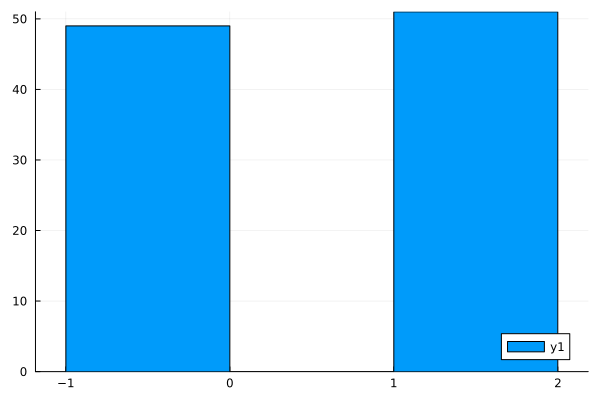

In [2]:
using Plots
mysamples=[mysample() for j in 1:100]
histogram(mysamples)

The fact that the samples are independent means that the value of one sample does not depend on any of the other values.  This means we can figure out the probability of any given set of outcomes by counting.

For example, suppose I draw 10 realizations, and want to know the probability of getting 4 ones and 6 minus ones. 

There are $\Omega=2^{10}$ total patterns of $\pm 1$'s that I could draw.  Let S be the number of patterns that have 4 ones and 6 minus ones.  The probability I am looking for is $S/\Omega$.  Lets start with one such pattern.  There are $10!$ ways of rearanging those numbers.  Not all of these are new patterns though.  If I rearrange the $+1$'s, it doesn't change the pattern.  Similarly if I rearange the $-1$'s it also doesn't.  Thus
\begin{equation}
P= 2^{-10}\frac{10!}{4!6!}.
\end{equation}

Warning:  This all seems simple, but these discrete probabilities are somewhat counter-intuitive.  Suppose you are playing the lottery, and you need to choose 6 numbers between 1 and 49.  Which pattern is more likely?  $1,2,3,4,5,6$ or $4,11,27,33,45$

As you can imagine, Julia has a function for sampling from a discrete distribution

In [3]:
using StatsBase

In [4]:
sample([1,-1],Weights([0.5,0.5]))

-1

In [5]:
Weights([0.5,0.5])

2-element Weights{Float64, Float64, Vector{Float64}}:
 0.5
 0.5

### Continuous distributions

For a continuous distribution, we specify the probability density.  Lets think about 1D, in which case we might write that the probability of finding a particle between points $a$ and $b$ is
\begin{equation}
P(a,b)=\int_{a}^b p(x)dx.
\end{equation}
The total probability must be 1, so
\begin{equation}
\int_{-\infty}^\infty p(x)dx=1
\end{equation}

A simple example is a uniform distribution:
\begin{equation}
p(x)=\left\{ 
\begin{array}{ll}1&0<x<1\\
0&x<0\quad\mbox{or}\quad x>1
\end{array}
\right.
\end{equation}

In Julia we can sample from a uniform distribution with `rand`

In [6]:
rand()

0.6456294879627904

we can also ask for a list or array of random numbers

In [7]:
rand(5)

5-element Vector{Float64}:
 0.5351917187709749
 0.3762285408151499
 0.9266026624835509
 0.87332396052608
 0.747278935839899

In [8]:
rand(2,3)

2×3 Matrix{Float64}:
 0.473591  0.0139024  0.411429
 0.123958  0.177517   0.508181

If we want a uniformly distributed number over a different range, we can just scale the output:

In [9]:
2*rand()-1 # gives random number from -1 to 1

-0.005647166989542818

What if we want to sample a non-uniform distribution?  For example
\begin{equation}
p(x)=\left\{ 
\begin{array}{ll}2x & 0<x<1\\
0&x<0\quad\mbox{or}\quad x>1
\end{array}
\right.
\end{equation}

A typical trick is to try to find a function $f$ such that if we take $x=f(y)$, and take $y$ to be uniformly distributed, we get $x$ to have the right distribution.   

Let $p(x)$ be the distribution for $x$, and $P(y)$ be the distribution for $y$.  The probability of having $y$ between $y_0$ and $y_1$ is
\begin{equation}
\int_{y_0}^{y_1} P(y)dy =\int_{f(y_0)}^{f(y_1)} p(x)dx
\end{equation}
Lets make $y_1=y_0+\delta y$, then as $\delta y\to 0$,
\begin{equation}
P(y_0)\delta y = p(x) f'(y_0)\delta y,
\end{equation}
or more compactly
\begin{equation}
P(y)=p(x) \frac{dx}{dy}.
\end{equation}
In the present case $P(y)=1$, and $p(x)=2 x$, so $dy/dx=2 x$.  

We can solve this for $y=x^2$, or equivalently $x=\sqrt{y}$.  Thus if we uniformly draw $y$'s between $0$ and $1$, and then take the square root, we get $x$'s whose distribution function is linear.


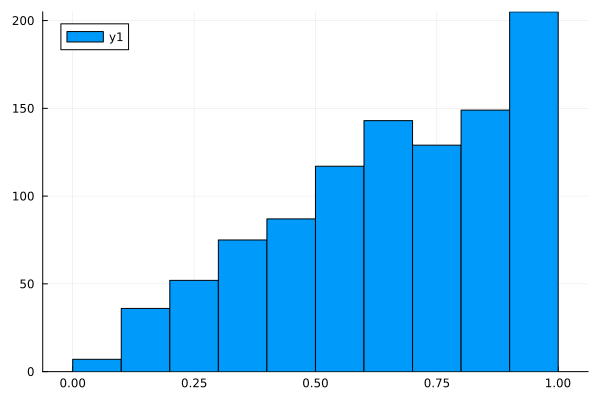

In [10]:
ylist=rand(1000)
xlist=sqrt.(ylist)
histogram(xlist)

One obvious confusion here is that we want to use $p$ for the probability distribution of $x$ and $y$.  One way to deal with this notational problem is to write a subscript on the $p$'s, so  $p_x(x)$ is  the probability distribution of $x$ and $p_y(y)$ is the probability distribution of $y$'s.  The mnemonic for the relationship is
\begin{equation}
p_y(y)dy=p_x(x)dx.
\end{equation}

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## In Class Activity
</h2>

What distribution would you get if you uniformly sample a random variable between $0$ and $1$ -- and then square it?  Make a prediction, and then plot the histogram.

### Sampling in higher dimensions

Suppose we want to uniformly sample all points inside the unit disk.  You might naively think you could just sample the radii and the angle.

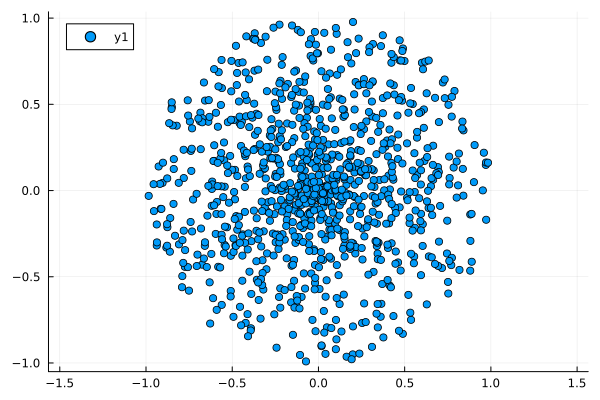

In [11]:
rads=rand(1000)
angles=2*pi*rand(1000)
pnts=[(r*cos(ϕ),r*sin(ϕ)) for (r,ϕ) in zip(rads,angles)]
scatter(pnts,aspect_ratio=:equal)

Clearly that is wrong -- as we ended up with more particles in the center.  The correct sampling is to note that the probability distribution for the radial coordinate is
\begin{align}
p_r(r)&=\int d^{2}\vec{r}\, p(\vec r) \delta(|\vec r|-r)\\
&\propto r.
\end{align}
Thus by our 1D result, we actually want to uniformly sample r^2

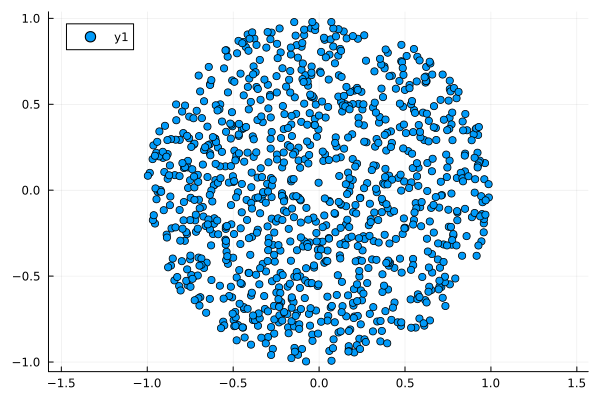

In [12]:
sqrads=rand(1000)
angles=2*pi*rand(1000)
rads=sqrt.(sqrads)
pnts=[(r*cos(ϕ),r*sin(ϕ)) for (r,ϕ) in zip(rads,angles)]
scatter(pnts,aspect_ratio=:equal)

More generally, if I have a change of variables $(x,y)=(p,q)$,  then the probablity distributions are related by the Jacobian
\begin{align}
\frac{p_{xy}(x,y)}{p_{pq}(p,q)}&=\left|\begin{array}{cc}
\frac{\partial p}{\partial x}&\frac{\partial p}{\partial y}\\
\frac{\partial q}{\partial x}&\frac{\partial q}{\partial y}
\end{array}
\right|\\
&= \frac{\partial p}{\partial x}\frac{\partial q}{\partial y}-\frac{\partial p}{\partial y}\frac{\partial q}{\partial x}
\end{align}

<h2 style="border: 2px solid #000; border-radius: 10px; padding: 20px; background-color:red; color:white;" >
## In Class Activity
</h2>

How would you uniformly sample from the surface of a sphere in 3 dimensions?  That is, you want to produce $(x,y,z)$ with $x^2+y^2+z^2=1$, that are uniformly distributed.

### Sampling from a Gaussian

A particularly useful distribution to sample is the Gaussian

$$p_x(x)=\frac{1}{\sqrt{\pi}}e^{-x^2} $$

Lets use the technique we have learned to try to sample this.  We are going to transform to a $y$ which we can uniformly sample:
\begin{equation}
\frac{p_x(x)}{p_y(y)}=\frac{\partial y}{\partial x}
\end{equation}
If $p_y$ is a constant we can solve this as
\begin{equation}
y(x)\propto \int_{-\infty}^x e^{-x^2}\, dx,
\end{equation}
which is an error function, and has no simple way to evaluate.

There is a trick, known as the Box-Muller algorithm, where one gets around this problem by working in 2 dimensions.  Lets try to sample from the 2-dimensional Gaussian 
\begin{equation}
p_{xy}(x,y)= \frac{1}{\pi}e^{-x^2-y^2}
\end{equation}
We can do this by uniformly sampling the angle $\phi$, then as before
\begin{align}
p_r(r)&= \int dx\,dy\,p_{xy}(x,y)\delta(\sqrt{x^2+y^2}-r)\\
&=2 r e^{-r^2}
\end{align}
But we can sample this, since
\begin{align}
p_r(r)&=\frac{d e^{-r^2}}{dr}.
\end{align}
We compare this with
\begin{equation}
\frac{p_r(r)}{p_s(s)}=\frac{d s}{dr},
\end{equation}
and conclude that we need to uniformly sample $s=e^{-r^2}$.  We then get two Gaussian sampled numbers:
\begin{align}
x&=\sqrt{-\log(s)}\cos(\phi)\\
y&=\sqrt{-\log(s)}\cos(\phi)
\end{align}

In [13]:
function boxmuller(n)
    halfn=Int64(ceil(n/2))
    svals=rand(halfn)
    phivals=2*pi*rand(halfn)
    scaledsvals= @. sqrt(-log(svals))
    vcat(scaledsvals.*cos.(phivals),scaledsvals.*cos.(phivals))[1:n]
end

boxmuller (generic function with 1 method)

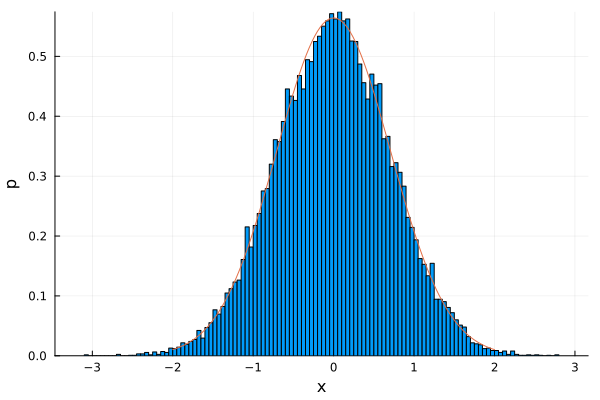

In [14]:
histogram(boxmuller(50000),normed=true,label="")
plot!(x->exp(-x^2)/sqrt(pi),-2,2,label="",xlabel="x",ylabel="p")

One caution is that this Gaussian has a standard deviation of $\sqrt{2}$.  Often the Box-Muller algorithm is described for a Guassian of standard deviation $1$.  Thus when you look up the expressions in a textbook there will be extra factors of 2 floating around. 

We do not need to write our own Box-Muller algorithm, as Julia already has it implemented:

In [15]:
using Distributions

In [16]:
d=Normal()

Normal{Float64}(μ=0.0, σ=1.0)

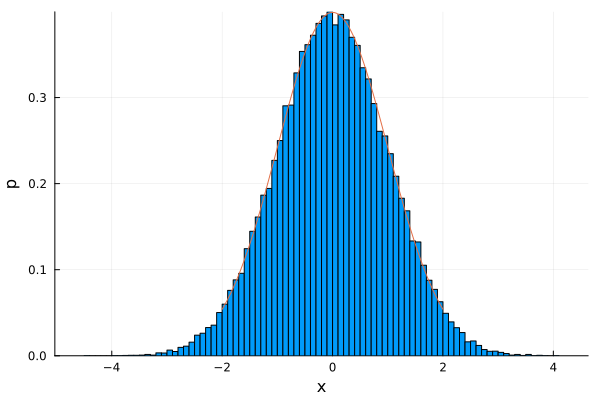

In [17]:
histogram(rand(d,50000),label="",normed=true)
plot!(x->exp(-x^2/2)/sqrt(2*pi),-2,2,label="",xlabel="x",ylabel="p")

## Rejection sampling

Another way to sample from a non-uniform distribution is to use rejection sampling.  Lets return to our example of 
\begin{equation}
p(x)=\left\{ 
\begin{array}{ll}2x & 0<x<1\\
0&x<0\quad\mbox{or}\quad x>1
\end{array}
\right.
\end{equation}
What we will do is uniformly sample $x$ from $[0,1]$.  Then we will roll a random number.  If that random number is less than $x$, we keep it, otherwise we start over and draw a new $x$.

In [18]:
function rsample()
    x=0.
    while true
        x=rand()
        y=rand()
        if y<x
            break
        end
    end
    return x
end

rsample(n)=[rsample() for j in 1:n]

rsample (generic function with 2 methods)

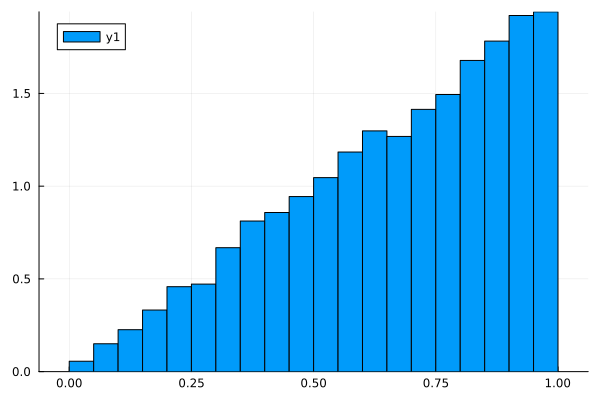

In [19]:
histogram(rsample(10000),normed=true)

The reason this works is we can write
\begin{equation}
p_x(x)=p_{\rm select}(x)p_{\rm accept}(x)
\end{equation}
The probability of selecting $x$ is uniform, while the acceptance probability is proportional to $x$ -- which gives the desired result.

## Markov Chains

So far all of our sampling methods have given us independent samples.  There are also approaches to finding series of samples, where the individual realizations are correlated, but after a large number of steps you have an unbiased sample.  

A great example is shuffling cards.  Every time you do a riffle shuffle, you somewhat mix up the cards, but they are not fully randomized.  However, if you do many riffles, you end up with a truly random set of cards.

A classic example for thinking about this is the [Ehrenfest urn model](https://en.wikipedia.org/wiki/Ehrenfest_model), also known as the dog and flea model.  Suppose you have two dogs, which have in total $N$ fleas on them.  At each time step one of the fleas hops from one dog to the other.

Suppose there are $j$ fleas on the left dog, and $N-j$ on the right dog.  You would expect that the probability of a hop from left to right would be proportional to the number of fleas on the left dog.  Similarly the probability of a hop from right to left is proportional to the number on the right one.  We will refer to the configuration of fleas as a *state* and label them by the number of fleas on the left dog.  

We say that in each step the probability of going from state $j$ to $j+1$ is $\Gamma_{j\to j+1}=j/N$ and the probability of going from $j$ to $j-1$ is $\Gamma_{j\to j-1}=(N-j)/N$.  You can verify that these probabilities add to 1.  Lets program this model.

In [20]:
function simulate_urn(initialj,N,numsteps)
    j=initialj
    path=[j]
    for i in 1:numsteps
        gammaplus=(N-j)/N
        if rand()<gammaplus
            j+=1
        else
            j-=1
        end
        push!(path,j)
    end
    path
end   

simulate_urn (generic function with 1 method)

Lets now simulate this for 100 steps, repeating the process 1000 times.

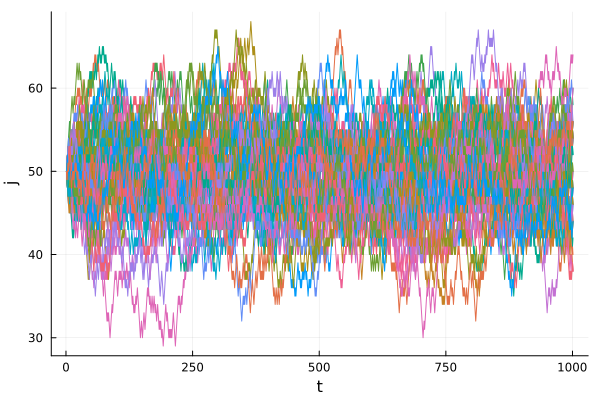

In [21]:
plt=plot(xlabel="t",ylabel="j")
for j in 1:50
    plot!(simulate_urn(50,100,1000),label="")
end
display(plt)

As you can see, things settle into some sort of steady state.  Here is the distribution at the final time

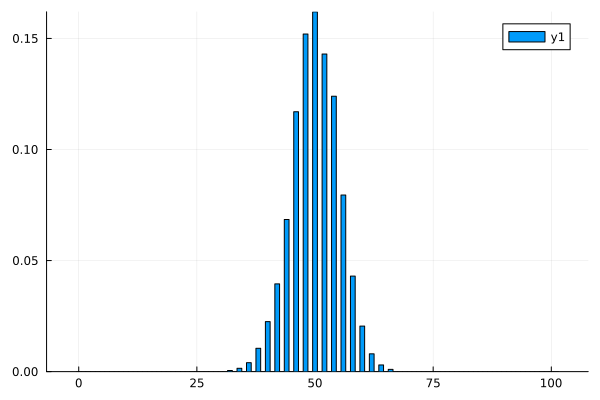

In [22]:
data=hcat([simulate_urn(50,100,1000) for j in 1:2000]...)
histogram(data[end,:],bins=-0.5:1:101.5,normed=true)

We can get better statistics if we bin all of the times:

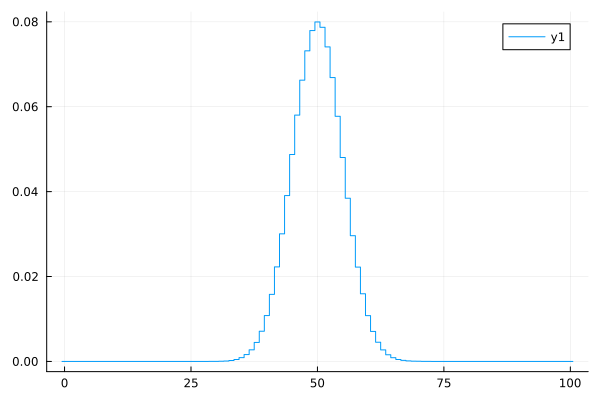

In [23]:
histogram(vcat(data[100:end,:]...),bins=-0.5:1:100.5,normed=true)

How can we understand this distribution?

Let $p_j(t)$ be the probability of site $j$ at time $t$.  By our rules,
\begin{equation}
p_j(t+1)=p_{j-1}(t)\Gamma_{j-1\to j} + p_{j+1}(t)\Gamma_{j+1\to j}
\end{equation}
It is useful to write this in terms of the change in probability:
\begin{align}
p_j(t+1)-p_j(t)&=p_{j-1}(t)\Gamma_{j-1\to j} + p_{j+1}(t)\Gamma_{j+1\to j}-p_j(t)\\
&= \left[p_{j-1}(t)\Gamma_{j-1\to j} -p_{j}(t)\Gamma_{j\to j-1}\right]
+ \left[p_{j+1}(t)\Gamma_{j+1\to j} -p_{j}(t)\Gamma_{j\to j+1}\right]
\end{align}
The terms in square brackets have a physical meaning:  They are the probability fluxes.  They are the net flow of probability between two sites.

After long time we reach a steady state, and these fluxes should vanish:
\begin{equation}
p_j \Gamma_{j\to j+1}=p_{j+1} \Gamma_{j+1\to j}
\end{equation}
In our particular case $\Gamma_{j\to j+1}=j/N$ and $\Gamma_{j+1\to j}=(N-j-1)/N$ and hence
\begin{equation}
j p_j =(N-j-1)p_{j+1}.
\end{equation}
One can show that the solution to this recurrance relationship is the binomial distribution
\begin{equation}
p_j = \frac{1}{2^N}\frac{N!}{j! (N-j)!},
\end{equation}
which we encountered earlier with our coin flip example.  Thus we can use this stochastic sequence to sample from the binomial distribution.

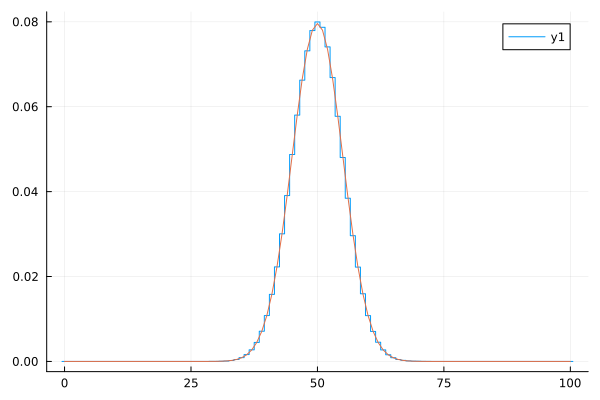

In [24]:
histogram(vcat(data[100:end,:]...),bins=-0.5:1:100.5,normed=true)
jlist=0:100
plist=[binomial(big(100),big(j))/(2.)^100 for j in jlist]
plot!(jlist,plist,label="")

Here I used `big` to convert integers into `BigInt` objects -- which are a form of integer which can be arbitrarily large

In [25]:
factorial(big(100))

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [26]:
factorial(100)

LoadError: OverflowError: 100 is too large to look up in the table; consider using `factorial(big(100))` instead

The Ehrenfest model is an example of a Markov chain.  A Markov chain is the simplest form of stochastic process.  It consists of a set of states $i$ (discrete in this case, but they could be continuous), and a set of transition rates $\Gamma_{i\to j}$.  If at time $t$ you are in state $i$, then you transition to state $j$ with probability $\Gamma_{i\to j}$.  Since probability must be normalized
\begin{equation}
\sum_j \Gamma_{i\to j}=1,
\end{equation}
though I should note that you are generically allowed to stay put: $\Gamma_{i\to i}$ can be non-zero.

Typically a Markov chain will reach a steady-state distribution.  By definition, the steady state distribution obeys a ballance condition
\begin{equation}
\sum_j p_j \Gamma_{j\to i} = \sum_j p_i \Gamma_{i\to j}.
\end{equation}
The net flux in to a state is equal to the net flux out.
In most cases that steady state distribution satisfies a stronger condition -- detailed balance -- meaning that the net flux between any two state vanishes:
\begin{equation}
p_i \Gamma_{i\to j} = p_j \Gamma_{j\to i}.
\end{equation}

## Using Markov chains to sample arbitrary distributions

An important application of Markov chains is we can use them to sample arbitrary distributions.  For example, suppose we want to sample $p_j\propto j$ for $j=1,2,\cdots 100$.  We could set up a Markov process where 
$\Gamma_{j\to j+1}/\Gamma_{j+1\to j}=(j+1)/j$.

One algorithm for coming up with the transition rates is the Metropolis algorithm.  It explicitly constructs $\Gamma_{i\to j}$ for $i\neq j$, then implicitly $\Gamma_{i\to i}=1-\sum_j \Gamma_{i\to j}$.  

We break $\Gamma_{i\to j}$ into two pieces:  a proposal $\Pi_{i\to j}$ and an acceptance $A_{i\to j}$.  Given our current state $i$, we choose a random move to $j$ with probability distribution $\Pi_{i\to j}$, then accept that move with probability $A_{i\to j}$.  If we don't accept, then we stay put.  The proposals are a probability distribution, so we need $\sum_j \Pi_{i\to j}=1$.

In this case, lets keep the proposal simple.  We will only propose moves which change $j$ by 1.  Lets take $\Pi_{j\to j+1}=\Pi_{j\to j-1}=1/2$.  To maintain normalization, on the edges we will also need to propose "staying put" as a move:  $\Pi_{1\to 1}=\Pi_{100\to 100}=1/2$.  Thus every proposed move will be equally likely.  

Next, we choose $A_{i\to j}$ to satisfy detailed balance.  One way to do this is take
\begin{equation}
A_{i\to j}=\rm{min}(1,p_j/p_i).
\end{equation}
In our case $A_{j\to j+1}=1$, and $A_{j+1\to j}=j/(j+1)$.

Lets code that up, passing the (non-normalized) distribution to the function

In [32]:
function markov_walk(initialj,distribution,numsteps)
    j=initialj
    path=[j]
    for i in 1:numsteps
        # randomly propose left or right
        if rand()<1/2 # propose left
            if j==1 || rand()>min(1,distribution[j-1]/distribution[j])
                push!(path,j)
                continue # go to next step of i loop
            end
            j-=1
            push!(path,j)
            continue
        end
        # We have chosen right
        if j==length(distribution) || 
                rand()>min(1,distribution[j+1]/distribution[j])
            push!(path,j)
            continue
        end
        j+=1
        push!(path,j)
    end
    path
end   

markov_walk (generic function with 1 method)

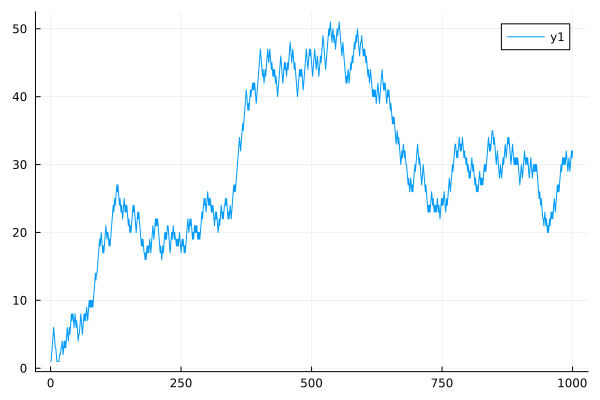

In [33]:
w=markov_walk(1,collect(1:100),1000000)
plot(w[1:1000])

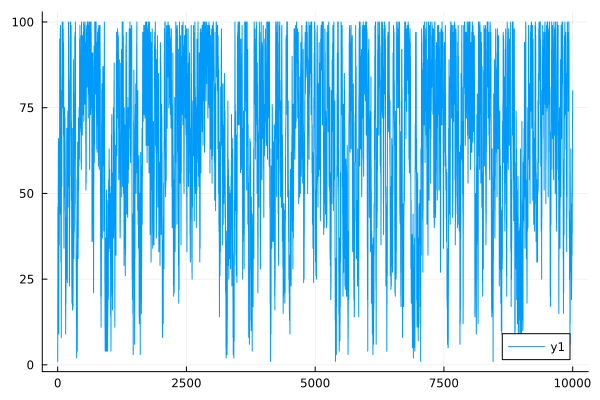

In [34]:
plot(w[1:100:end])

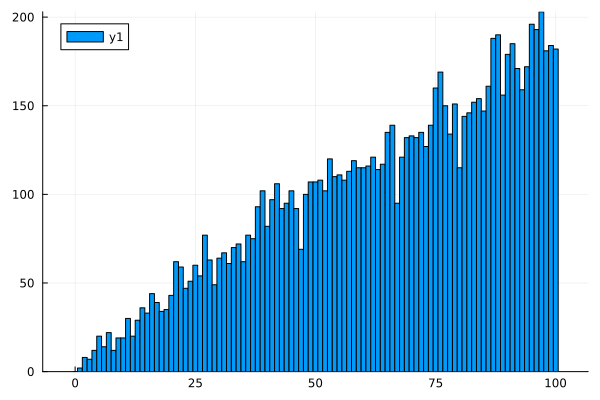

In [35]:
histogram(w[1000:100:end],bins=-0.5:1:100.5)

What is particularly useful about this approach is that one only needs to know the probability distribution up to a multiplicative factor.  It turns out that in statistical mechanics we will often know the ratios of probabilities, but not the absolute scale (state A is twice as likely as state B).